# Shall Personality Attract Your Partner?

# About the dataset

## Speed Dating Experiment

This dataset was compiled by Columbia Bussiness school to find out what infuences love at the first sight.
The data was gathered from paticipants in experimental speed dating events from 2000-2004. During the event, the attendees would have a four minute "first date" with every other paticipant of the oposite sex. Then they were asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligent, Fun, Ambition, and Shared Interest. There are also other information about there hobies, career, lifestyle, demographics...

In this notebook, we will go to analyze the data and check if there is any relevant between personality and the chance to have the second date. Let's start.


## Explore the dataset

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
dating_data = pd.read_csv("./Speed Dating Data.csv", encoding='ISO-8859-1')

In [13]:
dating_data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [14]:
dating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


Text(0,0.5,'Frequency')

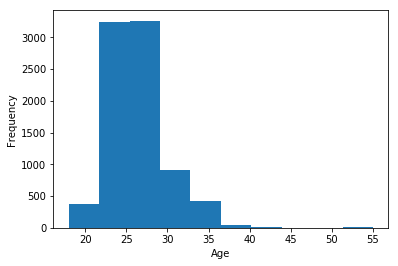

In [15]:
age = dating_data[np.isfinite(dating_data['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

In [16]:
match_count = dating_data[dating_data['match']==1]['match'].sum()
match_count_percent = match_count/len(dating_data.index)
print('math_count_percent = {}%'.format(match_count_percent))

math_count_percent = 0.16471711625686322%


## Let check the relevant between the match percentage and six personality attributes

In [34]:
data_filterred = dating_data.filter(['gender', 'match', 'attr1_1', 'sinc1_1', 'intel1_1', 
                                     'fun1_1', 'amb1_1', 'shar1_1', 'attr1_3', 'sinc1_3', 
                                     'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr7_3', 
                                     'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3', 
                                     'sports', 'tvsports', 'excersice', 'dining','museums', 
                                     'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 
                                     'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga'])
data_filterred = data_filterred.dropna()

In [38]:
data = data_filterred

In [39]:
data.head()

,gender,match,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr1_3,sinc1_3,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
3408,0,0,20.0,20.0,20.0,10.0,10.0,20.0,15.0,10.0,...,1.0,4.0,9.0,5.0,6.0,5.0,5.0,9.0,7.0,4.0
3409,0,0,20.0,20.0,20.0,10.0,10.0,20.0,15.0,10.0,...,1.0,4.0,9.0,5.0,6.0,5.0,5.0,9.0,7.0,4.0
3410,0,0,20.0,20.0,20.0,10.0,10.0,20.0,15.0,10.0,...,1.0,4.0,9.0,5.0,6.0,5.0,5.0,9.0,7.0,4.0
3411,0,0,20.0,20.0,20.0,10.0,10.0,20.0,15.0,10.0,...,1.0,4.0,9.0,5.0,6.0,5.0,5.0,9.0,7.0,4.0
3412,0,0,20.0,20.0,20.0,10.0,10.0,20.0,15.0,10.0,...,1.0,4.0,9.0,5.0,6.0,5.0,5.0,9.0,7.0,4.0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 3408 to 8377
Data columns (total 36 columns):
gender      1994 non-null int64
match       1994 non-null int64
attr1_1     1994 non-null float64
sinc1_1     1994 non-null float64
intel1_1    1994 non-null float64
fun1_1      1994 non-null float64
amb1_1      1994 non-null float64
shar1_1     1994 non-null float64
attr1_3     1994 non-null float64
sinc1_3     1994 non-null float64
intel1_3    1994 non-null float64
fun1_3      1994 non-null float64
amb1_3      1994 non-null float64
shar1_3     1994 non-null float64
attr7_3     1994 non-null float64
sinc7_3     1994 non-null float64
intel7_3    1994 non-null float64
fun7_3      1994 non-null float64
amb7_3      1994 non-null float64
shar7_3     1994 non-null float64
sports      1994 non-null float64
tvsports    1994 non-null float64
dining      1994 non-null float64
museums     1994 non-null float64
art         1994 non-null float64
hiking      1994 non-null float64
gaming    

In [41]:
data_female = data[data['gender']==0]
data_male = data[data['gender']==1]

In [45]:
stats_male_think = np.array(data_male[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].mean())
stats_female_think = np.array(data_female[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].mean())

#stats_male_think = np.array(data_male[['attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2']].mean())
#stats_female_think = np.array(data_female[['attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2']].mean())

stats_male_actually = np.array(data_male[['attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3']].mean())
stats_female_actually = np.array(data_female[['attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3']].mean())

labels=np.array(['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitous', 'Interest'])
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

stats_male_think=np.concatenate((stats_male_think,[stats_male_think[0]]))
stats_female_think=np.concatenate((stats_female_think,[stats_female_think[0]]))

stats_male_actually=np.concatenate((stats_male_actually,[stats_male_actually[0]]))
stats_female_actually=np.concatenate((stats_female_actually,[stats_female_actually[0]]))

angles=np.concatenate((angles,[angles[0]]))

## Let see what they think the attributes of partners they are looking for

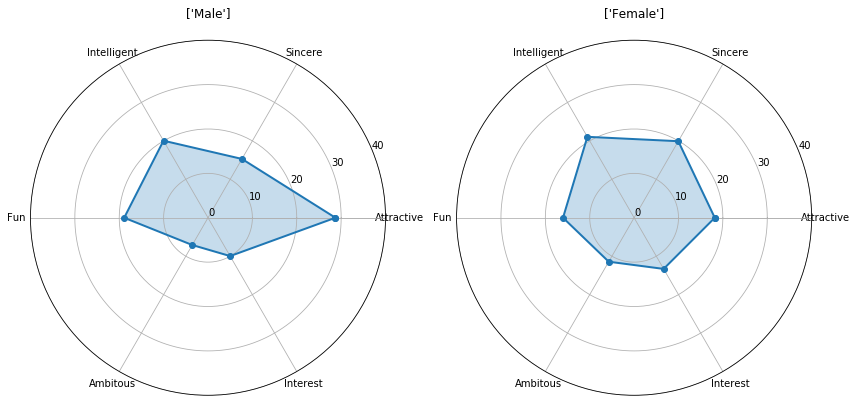

In [46]:
f, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize=(14,14))

ax1.plot(angles, stats_male_think, 'o-', linewidth=2)
ax1.fill(angles, stats_male_think, alpha=0.25)
ax1.set_thetagrids(angles * 180/np.pi, labels)
ax1.set_yticks(range(0, 50, 10))
ax1.set_title(['Male'])
ax1.grid(True)

ax2.plot(angles, stats_female_think, 'o-', linewidth=2)
ax2.fill(angles, stats_female_think, alpha=0.25)
ax2.set_thetagrids(angles * 180/np.pi, labels)
ax2.set_yticks(range(0, 50, 10))
ax2.set_title(['Female'])
ax2.grid(True)

## And what they actually do

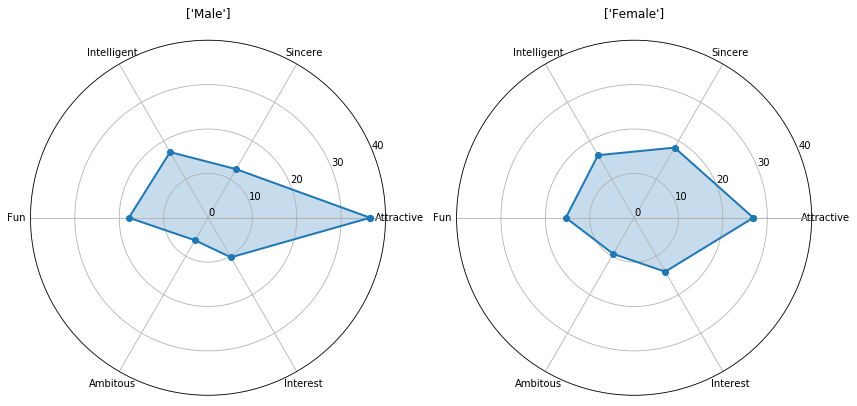

In [47]:
f1, (ax3, ax4) = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize=(14,14))

ax3.plot(angles, stats_male_actually, 'o-', linewidth=2)
ax3.fill(angles, stats_male_actually, alpha=0.25)
ax3.set_thetagrids(angles * 180/np.pi, labels)
ax3.set_yticks(range(0, 50, 10))
ax3.set_title(['Male'])
ax3.grid(True)

ax4.plot(angles, stats_female_actually, 'o-', linewidth=2)
ax4.fill(angles, stats_female_actually, alpha=0.25)
ax4.set_thetagrids(angles * 180/np.pi, labels)
ax4.set_yticks(range(0, 50, 10))
ax4.set_title(['Female'])
ax4.grid(True)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = data_filterred.drop(columns=['gender', 'match'])
y = data_filterred['match']

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 3408 to 8377
Data columns (total 34 columns):
attr1_1     1994 non-null float64
sinc1_1     1994 non-null float64
intel1_1    1994 non-null float64
fun1_1      1994 non-null float64
amb1_1      1994 non-null float64
shar1_1     1994 non-null float64
attr1_3     1994 non-null float64
sinc1_3     1994 non-null float64
intel1_3    1994 non-null float64
fun1_3      1994 non-null float64
amb1_3      1994 non-null float64
shar1_3     1994 non-null float64
attr7_3     1994 non-null float64
sinc7_3     1994 non-null float64
intel7_3    1994 non-null float64
fun7_3      1994 non-null float64
amb7_3      1994 non-null float64
shar7_3     1994 non-null float64
sports      1994 non-null float64
tvsports    1994 non-null float64
dining      1994 non-null float64
museums     1994 non-null float64
art         1994 non-null float64
hiking      1994 non-null float64
gaming      1994 non-null float64
clubbing    1994 non-null float64
readin

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()

In [54]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
prediction = model.predict(X_test)

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_test, prediction)

array([[498,   0],
       [101,   0]])

In [58]:
report = classification_report(y_test, prediction)
print(report)

             precision    recall  f1-score   support

          0       0.83      1.00      0.91       498
          1       0.00      0.00      0.00       101

avg / total       0.69      0.83      0.75       599



/home/daotran/Projects/CoderSchool/D1/ENTER/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
dating_data_full = dating_data[['iid', 'gender', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 
                   'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 
                   'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o', 'prob_o', 'met_o', 
                   'age', 'field', 'race', 'imprace', 'imprelig', 'from', 'goal', 'date', 'go_out', 
                   'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 
                   'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 
                   'music', 'shopping', 'yoga', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 
                   'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 
                   'like', 'prob', 'met']]


In [61]:
dating_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 67 columns):
iid         8378 non-null int64
gender      8378 non-null int64
pid         8368 non-null float64
match       8378 non-null int64
int_corr    8220 non-null float64
samerace    8378 non-null int64
age_o       8274 non-null float64
race_o      8305 non-null float64
pf_o_att    8289 non-null float64
pf_o_sin    8289 non-null float64
pf_o_int    8289 non-null float64
pf_o_fun    8280 non-null float64
pf_o_amb    8271 non-null float64
pf_o_sha    8249 non-null float64
dec_o       8378 non-null int64
attr_o      8166 non-null float64
sinc_o      8091 non-null float64
intel_o     8072 non-null float64
fun_o       8018 non-null float64
like_o      8128 non-null float64
prob_o      8060 non-null float64
met_o       7993 non-null float64
age         8283 non-null float64
field       8315 non-null object
race        8315 non-null float64
imprace     8299 non-null float64
imprelig    8299 non

In [62]:
dating_data_full = dating_data_full.drop(['field', 'career', 'from'], axis=1)

In [63]:
dating_data_full = dating_data_full.dropna()

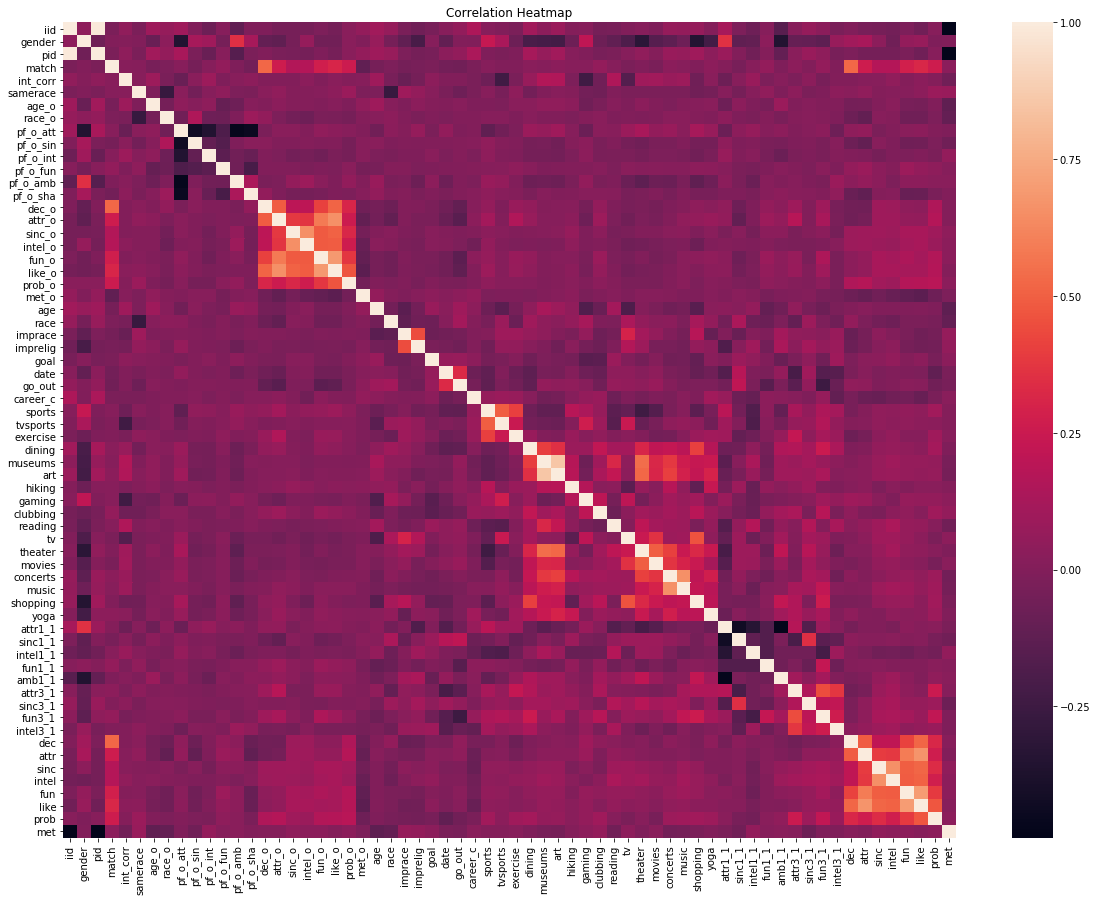

In [64]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = dating_data_full.corr()
corr
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [101]:
data_their_like = dating_data_full[['match', 'dec','dec_o','attr','attr_o','fun','fun_o','like','like_o','int_corr']]

             match       dec     dec_o      attr    attr_o       fun  \
match     1.000000  0.524295  0.525080  0.265760  0.263869  0.280478   
dec       0.524295  1.000000 -0.058144  0.493142 -0.064334  0.417078   
dec_o     0.525080 -0.058144  1.000000 -0.059869  0.488593  0.043006   
attr      0.265760  0.493142 -0.059869  1.000000 -0.046653  0.591732   
attr_o    0.263869 -0.064334  0.488593 -0.046653  1.000000  0.061342   
fun       0.280478  0.417078  0.043006  0.591732  0.061342  1.000000   
fun_o     0.278102  0.039615  0.409977  0.058565  0.582544  0.149167   
like      0.315384  0.520802  0.039154  0.670203  0.052146  0.698482   
like_o    0.312442  0.038387  0.515739  0.057860  0.661841  0.125112   
int_corr  0.017822  0.004146  0.002915  0.015593  0.001777  0.008989   

             fun_o      like    like_o  int_corr  
match     0.278102  0.315384  0.312442  0.017822  
dec       0.039615  0.520802  0.038387  0.004146  
dec_o     0.409977  0.039154  0.515739  0.002915  
att

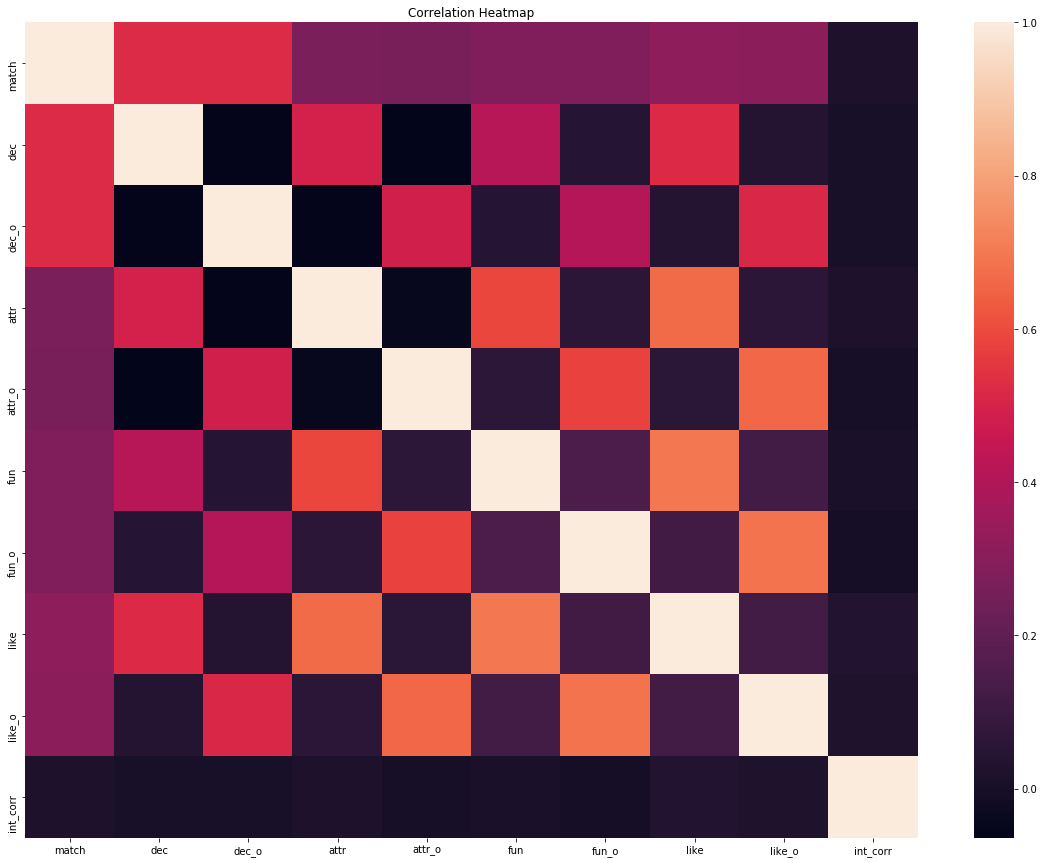

In [102]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = data_their_like.corr()
print(corr)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [104]:
X = data_their_like[['dec_o', 'like_o']]
y = data_their_like['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [105]:
model = LogisticRegression()

In [106]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
prediction = model.predict(X_test)

In [108]:
confusion_matrix(y_test, prediction)

array([[1681,   11],
       [ 330,   18]])

In [109]:
report = classification_report(y_test, prediction)
print(report)

             precision    recall  f1-score   support

          0       0.84      0.99      0.91      1692
          1       0.62      0.05      0.10       348

avg / total       0.80      0.83      0.77      2040

